By : Ang Qi Yang Ryan
        2B04
        P2123079

set TF_MODEL_DIR="C:/Users/Ryan Ang/Downloads/ca2-2b04-p2123079-ryanang-main/cifar100"

docker run --rm -p 8501:8501 --name ca2-2b04-p2123079-ryanang-main --mount type=bind,source=%TF_MODEL_DIR%/img_classifier,target=/models/img_classifier --mount type=bind,source=%TF_MODEL_DIR%/vgg_img_classifier,target=/models/vgg_img_classifier --mount type=bind,source=%TF_MODEL_DIR%/config,target=/config tensorflow/serving --model_config_file=/config/models.config

docker run -tid -v /var/run/docker.sock:/var/run/docker.sock -v /usr/bin/docker:/usr/bin/docker --name CA2_DLWEB_Server python:3.8

# Part B - Convolutional Neural Network 2 CIFAR100 DATASET
    implement an image classifier that are in colour instead of black and white 

#### Evaluation Criteria : 
    Background Research & Data Exploration 20%
    Feature Engineering or Data Augmentation 20%
    Modelling and Evaluation 20%
    Model Improvement 20%
    Demo/Presentation and Quality of report (Jupyter) 20%

#### Steps to approach CIFAR 100 dataset
    1.Pull coarse and fine labels data, process them 
    2.Try a baseline model and see how it performs on fine labels
    3.Tune baseline model and see how it performs
    4.Try different model architecture 
    5. Select the best model before tuning     

# Reasearch on CIFAR 100 data
    CIFAR 100 is a labeled subset of 80 million image datset which CIFAR stands for Canadian Institute for Advanced Research. The dataset consists of 60000 coloured images (50000 for train, 10000 for test) of 32 x 32 pixels in 100 classes grouped by 20 superclasses. Each iamge has a fine label(class) and a coarse label(superclass)

#### Import necessary modules

In [2]:
!pip install visualkeras

     ---------------------------------------- 43.3/43.3 kB ? eta 0:00:00


In [ ]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.optimizers import Adam,SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping
import visualkeras

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)



: 

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

#### grab the CIFAR 100 Dataset

In [4]:
from tensorflow.keras.datasets import cifar100

(X_train, y_train), (X_test, y_test)=cifar100.load_data()

print('Shape of X_train is {}'.format(X_train.shape))
print('Shape of X_test is {}'.format(X_test.shape)) 
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

X_train,X_val,y_train,y_val = train_test_split(X_train, y_train, test_size = 0.2,random_state=2018)

# Normalizing
X_train=X_train/255
X_test=X_test/255
X_val = X_val/255

#One hot encoding
y_train=to_categorical(y_train,100)
y_test=to_categorical(y_test,100)
y_val = to_categorical(y_val, num_classes = 100)

print('----------------------------------------------')
print('Shape of X_train is {}'.format(X_train.shape))
print('Shape of X_test is {}'.format(X_test.shape)) 
print('Shape of X_val is {}'.format(X_val.shape)) 

print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))
print('Shape of y_val is {}'.format(y_val.shape)) 

Shape of X_train is (50000, 32, 32, 3)
Shape of X_test is (10000, 32, 32, 3)
Shape of y_train is (50000, 1)
Shape of y_test is (10000, 1)
----------------------------------------------
Shape of X_train is (40000, 32, 32, 3)
Shape of X_test is (10000, 32, 32, 3)
Shape of X_val is (10000, 32, 32, 3)
Shape of y_train is (40000, 100)
Shape of y_test is (10000, 100)
Shape of y_val is (10000, 100)


In [5]:
# pulling the coarse data

(X_train_coarse, y_train_coarse), (X_test_coarse, y_test_coarse)=cifar100.load_data(label_mode='coarse')

print('Shape of X_train_coarse is {}'.format(X_train_coarse.shape))
print('Shape of X_test_coarse is {}'.format(X_test_coarse.shape)) 
print('Shape of y_train_coarse is {}'.format(y_train_coarse.shape))
print('Shape of y_test_coarse is {}'.format(y_test_coarse.shape))

X_train_coarse,X_val_coarse,y_train_coarse,y_val_coarse = train_test_split(X_train_coarse, y_train_coarse, test_size = 0.2,random_state=2018)

# Normalizing
X_train_coarse=X_train_coarse/255
X_test_coarse=X_test_coarse/255
X_val_coarse = X_val_coarse/255

#One hot encoding
y_train_coarse=to_categorical(y_train_coarse,20)
y_test_coarse=to_categorical(y_test_coarse,20)
y_val_coarse = to_categorical(y_val_coarse,20)

print('----------------------------------------------')
print('Shape of X_train_coarse is {}'.format(X_train_coarse.shape))
print('Shape of X_test_coarse is {}'.format(X_test_coarse.shape)) 
print('Shape of X_val_coarse is {}'.format(X_val_coarse.shape)) 

print('Shape of y_train_coarse is {}'.format(y_train_coarse.shape))
print('Shape of y_test_coarse is {}'.format(y_test_coarse.shape))
print('Shape of y_val_coarse is {}'.format(y_val_coarse.shape)) 

Shape of X_train_coarse is (50000, 32, 32, 3)
Shape of X_test_coarse is (10000, 32, 32, 3)
Shape of y_train_coarse is (50000, 1)
Shape of y_test_coarse is (10000, 1)
----------------------------------------------
Shape of X_train_coarse is (40000, 32, 32, 3)
Shape of X_test_coarse is (10000, 32, 32, 3)
Shape of X_val_coarse is (10000, 32, 32, 3)
Shape of y_train_coarse is (40000, 20)
Shape of y_test_coarse is (10000, 20)
Shape of y_val_coarse is (10000, 20)


In [4]:
X_train.shape

(40000, 32, 32, 3)

# EDA

In [24]:
labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 
'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 
'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 
'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 
'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'] 

Coarse_labels = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 
 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 
 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']

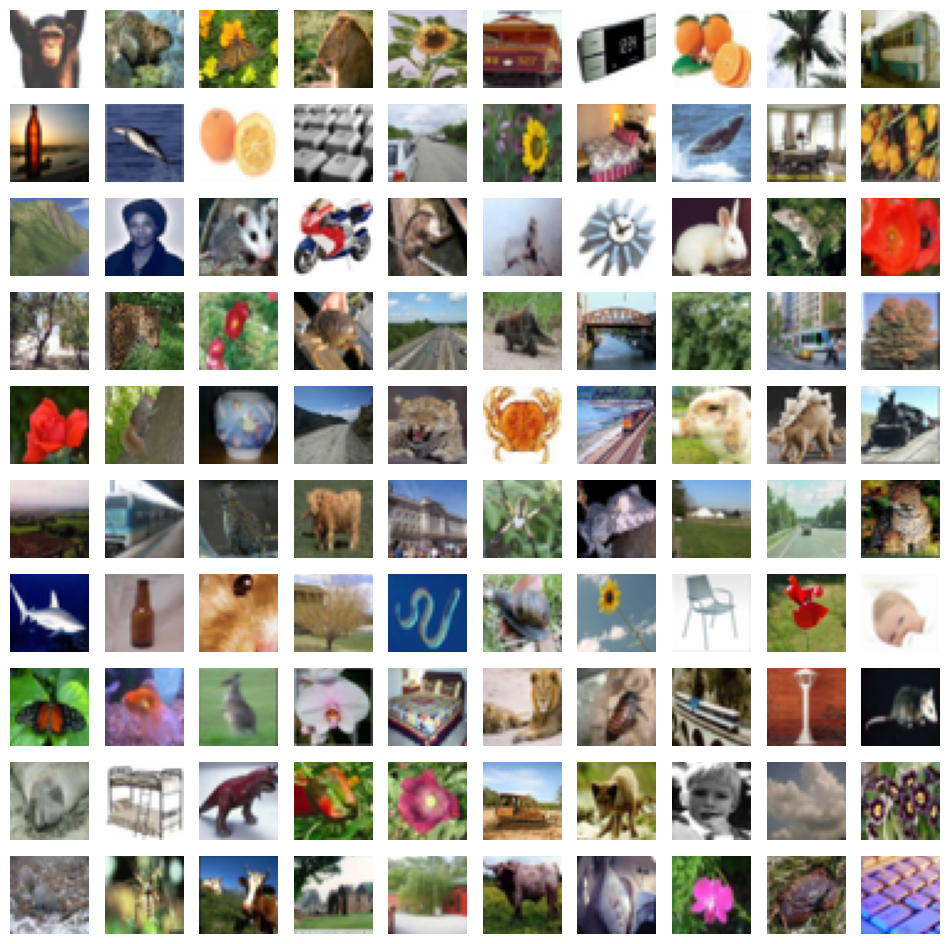

In [5]:
plt.figure(figsize=(12,12))
for i in range(100):
  plt.subplot(10,10,1+i)
  plt.axis('off')
  plt.imshow(X_train[i],cmap='gray')

# Defining params

In [6]:
NO_EPOCHS = 200
BATCH_SIZE = 128

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

# Baseline Model 1

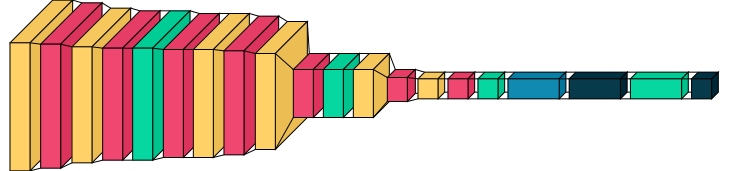

In [38]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                    activation='relu',
                    padding = 'same',
                    input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))
model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
model.add(Conv2D(64,kernel_size=(3,3),
                    activation='relu',
                    padding = 'same',
                    input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(128,kernel_size=(3,3),
                    activation='relu',
                    padding = 'same',
                    input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(100, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])
visualkeras.layered_view(model)

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 28, 28, 32)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 27, 27, 32)      

In [40]:
train_model = model.fit(X_train,y_train,
                    batch_size = BATCH_SIZE,
                    epochs=NO_EPOCHS,
                    callbacks = [callback],
                    verbose = 2,
                    validation_data=(X_val,y_val))

Epoch 1/200


In [7]:
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = tools.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    
    iplot(fig, filename='accuracy-loss')


In [13]:
plot_accuracy_and_loss(train_model)

# Improving our baseline model - by batch normalization, data augmentation

In [8]:
datagen = ImageDataGenerator(
    rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_rangeD=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)


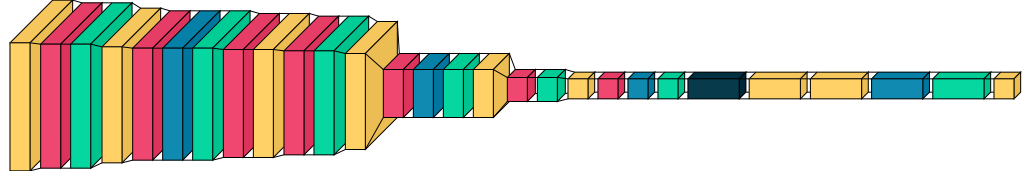

In [9]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                    activation='relu',
                    padding = 'same',
                    input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
#Adding batch normalization to the mdoel
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))
model.add(Dropout(0.2))
#Adding batch normalization to the mdoel
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
model.add(Conv2D(64,kernel_size=(3,3),
                    activation='relu',
                    padding = 'same',
                    input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
#Adding batch normalization to the mdoel
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
#Adding batch normalization to the mdoel
model.add(BatchNormalization())

model.add(Conv2D(128,kernel_size=(3,3),
                    activation='relu',
                    padding = 'same',
                    input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
#Adding batch normalization to the mdoel
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
#Adding batch normalization to the mdoel
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(100, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

visualkeras.layered_view(model)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 31, 31, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                        

In [11]:
augmentedData = datagen.flow(X_train,y_train,batch_size = 50000)
for i in range(2):
    X, y = augmentedData.next()
    X_train = np.concatenate((X_train,X), axis=0)
    y_train = np.concatenate((y_train,y), axis=0)
    

X_train.shape
y_train.shape

(120000, 100)

In [12]:
augmentedData = datagen.flow(X_val,y_val,batch_size = 50000)
for i in range(2):
    X, y = augmentedData.next()
    X_val = np.concatenate((X_val,X), axis=0)
    y_val = np.concatenate((y_val,y), axis=0)

In [15]:
train_model = model.fit(X_train, y_train,
                    batch_size = 128,
                    epochs=NO_EPOCHS,
                    callbacks = [callback],
                    verbose = 2,
                    validation_data=(X_val,y_val))

Epoch 1/200
938/938 - 30s - loss: 4.4093 - accuracy: 0.0663 - val_loss: 4.2974 - val_accuracy: 0.0647 - 30s/epoch - 32ms/step
Epoch 2/200
938/938 - 19s - loss: 3.8172 - accuracy: 0.1276 - val_loss: 3.9804 - val_accuracy: 0.0974 - 19s/epoch - 20ms/step
Epoch 3/200
938/938 - 19s - loss: 3.5266 - accuracy: 0.1692 - val_loss: 3.9030 - val_accuracy: 0.1143 - 19s/epoch - 20ms/step
Epoch 4/200
938/938 - 19s - loss: 3.3019 - accuracy: 0.2050 - val_loss: 3.5076 - val_accuracy: 0.1643 - 19s/epoch - 20ms/step
Epoch 5/200
938/938 - 19s - loss: 3.1344 - accuracy: 0.2339 - val_loss: 3.4015 - val_accuracy: 0.1883 - 19s/epoch - 20ms/step
Epoch 6/200
938/938 - 19s - loss: 2.9904 - accuracy: 0.2609 - val_loss: 3.3176 - val_accuracy: 0.2040 - 19s/epoch - 20ms/step
Epoch 7/200
938/938 - 19s - loss: 2.8777 - accuracy: 0.2805 - val_loss: 3.0773 - val_accuracy: 0.2463 - 19s/epoch - 20ms/step
Epoch 8/200
938/938 - 19s - loss: 2.7687 - accuracy: 0.2995 - val_loss: 3.2429 - val_accuracy: 0.2228 - 19s/epoch - 20

In [16]:
plot_accuracy_and_loss(train_model)

c:\Users\ryan\anaconda3\envs\gpu_env\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



# VGG 16 baseline model 

In [10]:
from keras import regularizers
weight_decay = 0.0005

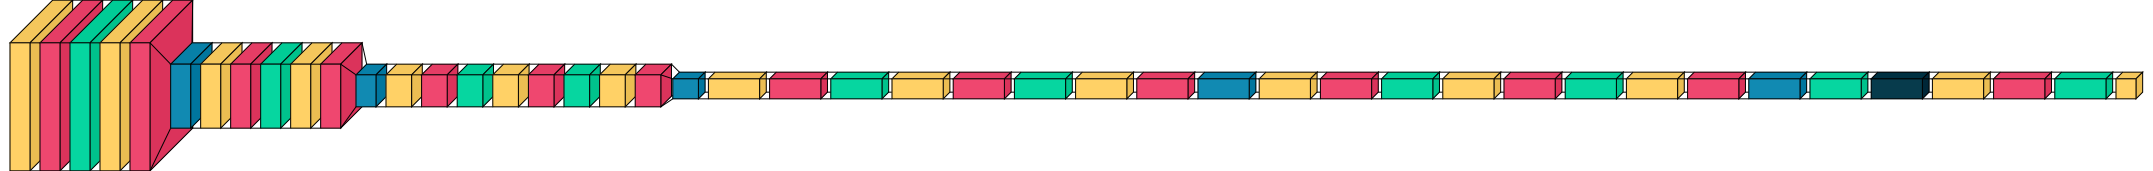

In [64]:
model = Sequential()


model.add(Conv2D(64, (3, 3), 
                padding='same',
                activation='relu',
                input_shape = (32,32,3),
                kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(100,activation='softmax'))
visualkeras.layered_view(model)

In [65]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_235 (Conv2D)         (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_108 (Ba  (None, 32, 32, 64)       256       
 tchNormalization)                                               
                                                                 
 dropout_68 (Dropout)        (None, 32, 32, 64)        0         
                                                                 
 conv2d_236 (Conv2D)         (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_109 (Ba  (None, 32, 32, 64)       256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 16, 16, 64)     

In [27]:
sgd = SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

In [28]:
train_model = model.fit(X_train, y_train,
                    batch_size = BATCH_SIZE,
                    epochs=NO_EPOCHS,
                    callbacks = [callback],
                    verbose = 2,
                    validation_data=(X_val,y_val))
model.save_weights('cifar100vgg2.h5')  


Epoch 1/200
938/938 - 51s - loss: 7.2407 - accuracy: 0.0223 - val_loss: 6.6581 - val_accuracy: 0.0271 - 51s/epoch - 55ms/step
Epoch 2/200
938/938 - 48s - loss: 6.6875 - accuracy: 0.0425 - val_loss: 7.4304 - val_accuracy: 0.0247 - 48s/epoch - 51ms/step
Epoch 3/200
938/938 - 48s - loss: 6.4036 - accuracy: 0.0621 - val_loss: 7.2604 - val_accuracy: 0.0392 - 48s/epoch - 51ms/step
Epoch 4/200
938/938 - 48s - loss: 6.2413 - accuracy: 0.0760 - val_loss: 6.7841 - val_accuracy: 0.0457 - 48s/epoch - 51ms/step
Epoch 5/200
938/938 - 48s - loss: 6.0743 - accuracy: 0.0875 - val_loss: 6.7070 - val_accuracy: 0.0604 - 48s/epoch - 51ms/step
Epoch 6/200
938/938 - 48s - loss: 5.8833 - accuracy: 0.1026 - val_loss: 6.8703 - val_accuracy: 0.0820 - 48s/epoch - 51ms/step
Epoch 7/200
938/938 - 48s - loss: 5.7323 - accuracy: 0.1209 - val_loss: 6.2522 - val_accuracy: 0.0934 - 48s/epoch - 51ms/step
Epoch 8/200
938/938 - 48s - loss: 5.5874 - accuracy: 0.1361 - val_loss: 8.6337 - val_accuracy: 0.0944 - 48s/epoch - 51

In [29]:
plot_accuracy_and_loss(train_model)

In [30]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 16s 50ms/step - loss: 2.7922 - accuracy: 0.6402
Test loss: 2.7921714782714844
Test accuracy: 0.6402000188827515


# Accuracy for fine labels = 64 percentage
    Now, we can load the saved model and train on the coarse labels

In [11]:
vggmodel = Sequential()


vggmodel.add(Conv2D(64, (3, 3), 
                padding='same',
                activation='relu',
                input_shape = (32,32,3),
                kernel_regularizer=regularizers.l2(weight_decay)))
vggmodel.add(BatchNormalization())
vggmodel.add(Dropout(0.3))

vggmodel.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
vggmodel.add(BatchNormalization())

vggmodel.add(MaxPooling2D(pool_size=(2, 2)))

vggmodel.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
vggmodel.add(BatchNormalization())
vggmodel.add(Dropout(0.4))

vggmodel.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
vggmodel.add(BatchNormalization())

vggmodel.add(MaxPooling2D(pool_size=(2, 2)))

vggmodel.add(Conv2D(256, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
vggmodel.add(BatchNormalization())
vggmodel.add(Dropout(0.4))

vggmodel.add(Conv2D(256, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
vggmodel.add(BatchNormalization())
vggmodel.add(Dropout(0.4))

vggmodel.add(Conv2D(256, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
vggmodel.add(BatchNormalization())

vggmodel.add(MaxPooling2D(pool_size=(2, 2)))


vggmodel.add(Conv2D(512, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
vggmodel.add(BatchNormalization())
vggmodel.add(Dropout(0.4))

vggmodel.add(Conv2D(512, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
vggmodel.add(BatchNormalization())
vggmodel.add(Dropout(0.4))

vggmodel.add(Conv2D(512, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
vggmodel.add(BatchNormalization())
vggmodel.add(MaxPooling2D(pool_size=(2, 2)))


vggmodel.add(Conv2D(512, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
vggmodel.add(BatchNormalization())
vggmodel.add(Dropout(0.4))

vggmodel.add(Conv2D(512, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
vggmodel.add(BatchNormalization())
vggmodel.add(Dropout(0.4))

vggmodel.add(Conv2D(512, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
vggmodel.add(BatchNormalization())

vggmodel.add(MaxPooling2D(pool_size=(2, 2)))
vggmodel.add(Dropout(0.5))

vggmodel.add(Flatten())
vggmodel.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
vggmodel.add(BatchNormalization())

vggmodel.add(Dropout(0.5))
vggmodel.add(Dense(100,activation='softmax'))

vggmodel.load_weights("cifar100vgg2.h5")


In [ ]:
vggmodel.save('vgg_cifar10')

In [12]:
vggmodel.pop()
vggmodel.add(Dense(20,activation='softmax'))

In [13]:
vggmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)      

In [14]:
sgd = SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
vggmodel.compile(loss='catDegorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

In [15]:
augmentedData = datagen.flow(X_train_coarse,y_train_coarse,batch_size = 40000)
for i in range(2):
    X, y = augmentedData.next()
    X_train_coarse = np.concatenate((X_train_coarse,X), axis=0)
    y_train_coarse = np.concatenate((y_train_coarse,y), axis=0)
    
augmentedDataVal = datagen.flow(X_val_coarse,y_val_coarse,batch_size = 40000)
for i in range(2):
    X_val, y_val = augmentedData.next()
    X_val_coarse = np.concatenate((X_val_coarse,X), axis=0)
    y_val_coarse = np.concatenate((y_val_coarse,y), axis=0)

In [16]:
print(X_train_coarse.shape)
print(y_train_coarse.shape)
print(X_val_coarse.shape)
print(y_train_coarse.shape)

(120000, 32, 32, 3)
(120000, 20)
(90000, 32, 32, 3)
(120000, 20)


In [17]:
vgg_train_model = vggmodel.fit(X_train_coarse, y_train_coarse,
                    batch_size = BATCH_SIZE,
                    epochs=50,
                    callbacks = [callback],
                    verbose = 2,
                    validation_data=(X_val_coarse,y_val_coarse))

Epoch 1/50
938/938 - 72s - loss: 1.0463 - accuracy: 0.8458 - val_loss: 0.8044 - val_accuracy: 0.9262 - 72s/epoch - 77ms/step
Epoch 2/50
938/938 - 56s - loss: 0.8900 - accuracy: 0.8901 - val_loss: 0.7699 - val_accuracy: 0.9356 - 56s/epoch - 60ms/step
Epoch 3/50
938/938 - 54s - loss: 0.8488 - accuracy: 0.9021 - val_loss: 0.7335 - val_accuracy: 0.9486 - 54s/epoch - 58ms/step
Epoch 4/50
938/938 - 54s - loss: 0.8152 - accuracy: 0.9112 - val_loss: 0.7593 - val_accuracy: 0.9419 - 54s/epoch - 58ms/step
Epoch 5/50
938/938 - 54s - loss: 0.7955 - accuracy: 0.9172 - val_loss: 0.7225 - val_accuracy: 0.9542 - 54s/epoch - 58ms/step
Epoch 6/50
938/938 - 54s - loss: 0.7739 - accuracy: 0.9232 - val_loss: 0.7271 - val_accuracy: 0.9523 - 54s/epoch - 58ms/step
Epoch 7/50
938/938 - 54s - loss: 0.7575 - accuracy: 0.9267 - val_loss: 0.7724 - val_accuracy: 0.9405 - 54s/epoch - 58ms/step
Epoch 8/50
938/938 - 54s - loss: 0.7437 - accuracy: 0.9310 - val_loss: 0.7342 - val_accuracy: 0.9528 - 54s/epoch - 58ms/step


In [20]:
vggmodel.save_weights('VGG_Model_trainFineCoarse')

In [45]:
plot_accuracy_and_loss(vgg_train_model)

c:\Users\ryan\anaconda3\envs\gpu_env\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [47]:
vggmodel.evaluate(X_test_coarse, y_test_coarse, verbose=1)

313/313 [==============================] - 3s 8ms/step - loss: 1.6259 - accuracy: 0.7654


[1.6259182691574097, 0.7653999924659729]

In [96]:
vggmodel.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 4s 9ms/step - loss: 2.7922 - accuracy: 0.6402


[2.7921714782714844, 0.6402000188827515]

# Evaluating our final model

In [22]:
#get the predictions for the test data
predicted_classes = np.argmax(vggmodel.predict(X_test), axis = 1)
predicted_classes_coarse = np.argmax(vggmodel.predict(X_test_coarse), axis = 1)

313/313 [==============================] - 6s 19ms/step


In [23]:
print(predicted_classes.shape)
print(predicted_classes_coarse.shape)

(10000,)
(10000,)


In [27]:
report = classification_report(
    np.argmax(y_test_coarse, axis=1), predicted_classes_coarse, target_names=Coarse_labels
)

print(report)

                                precision    recall  f1-score   support

               aquatic_mammals       0.66      0.63      0.64       500
                          fish       0.79      0.69      0.74       500
                       flowers       0.93      0.78      0.85       500
               food_containers       0.79      0.75      0.77       500
          fruit_and_vegetables       0.79      0.86      0.82       500
  household_electrical_devices       0.71      0.75      0.73       500
           household_furniture       0.79      0.84      0.81       500
                       insects       0.82      0.72      0.77       500
              large_carnivores       0.70      0.69      0.69       500
 large_man-made_outdoor_things       0.81      0.84      0.83       500
  large_natural_outdoor_scenes       0.71      0.91      0.80       500
large_omnivores_and_herbivores       0.73      0.72      0.73       500
                medium_mammals       0.68      0.72      0.70  

# Predicted wrongly for Fine labels

In [28]:
wrong_example_mask = (np.argmax(y_test, axis=1) != predicted_classes)
X_test_wrong = X_test[wrong_example_mask]
y_test_wrong = np.argmax(y_test[wrong_example_mask], axis=1)
y_pred_wrong = predicted_classes[wrong_example_mask]

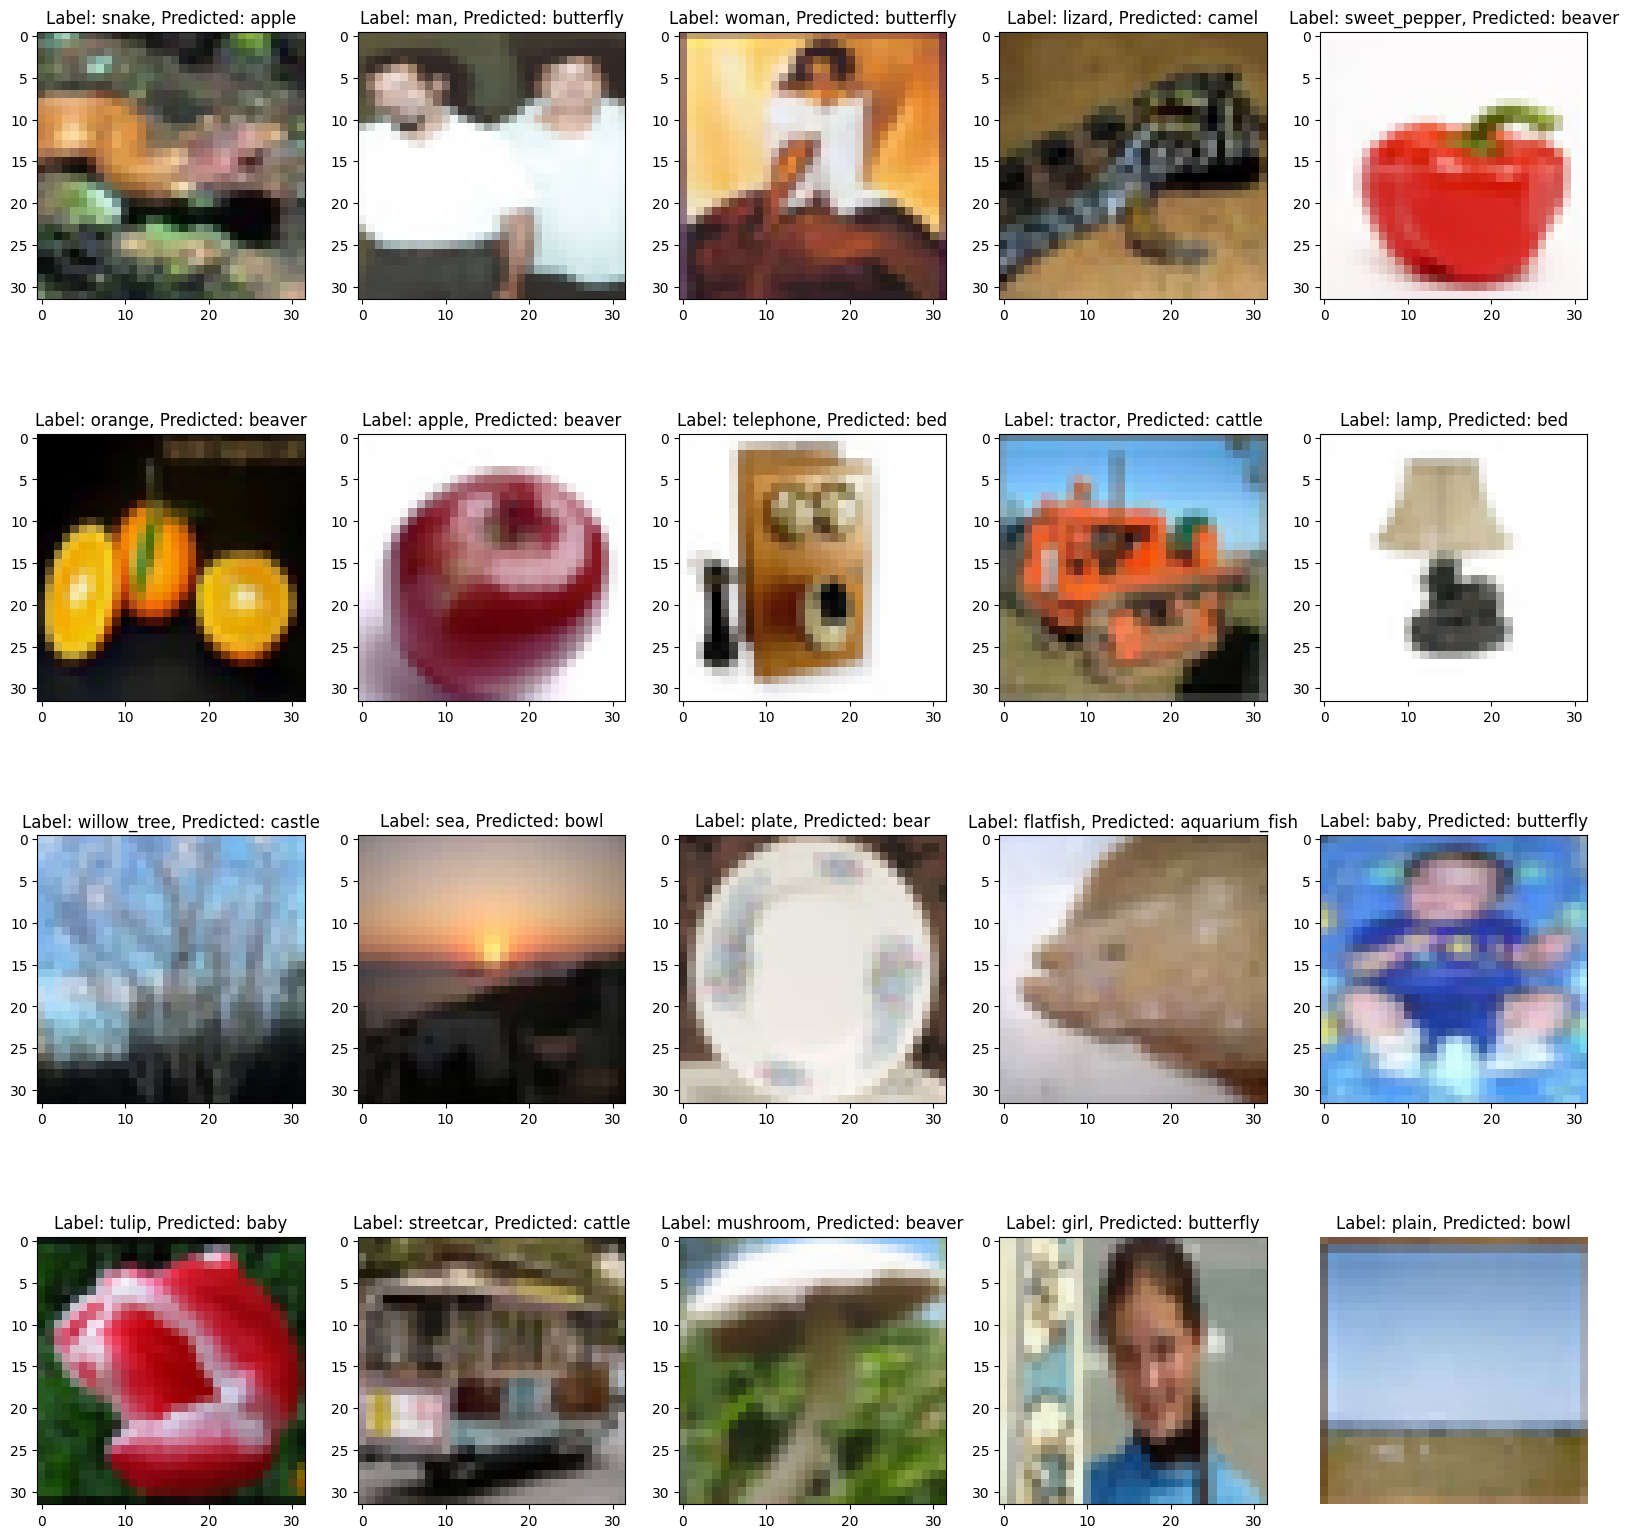

In [29]:
random_idxs = np.random.choice(X_test_wrong.shape[0], 20, replace=False)

fig, ax = plt.subplots(4, 5, figsize=(20, 20))
plt.axis("off")
for idx, subplot in zip(random_idxs, ax.ravel()):
  pred = labels[y_pred_wrong[idx]]
  actual = labels[y_test_wrong[idx]]
  subplot.imshow(X_test_wrong[idx], cmap='gray')
  subplot.set_title(f"Label: {actual}, Predicted: {pred}")


In [34]:
wrong_example_mask = (np.argmax(y_test, axis=1) == predicted_classes)
X_test_wrong = X_test[wrong_example_mask]
y_test_wrong = np.argmax(y_test[wrong_example_mask], axis=1)
y_pred_wrong = predicted_classes[wrong_example_mask]

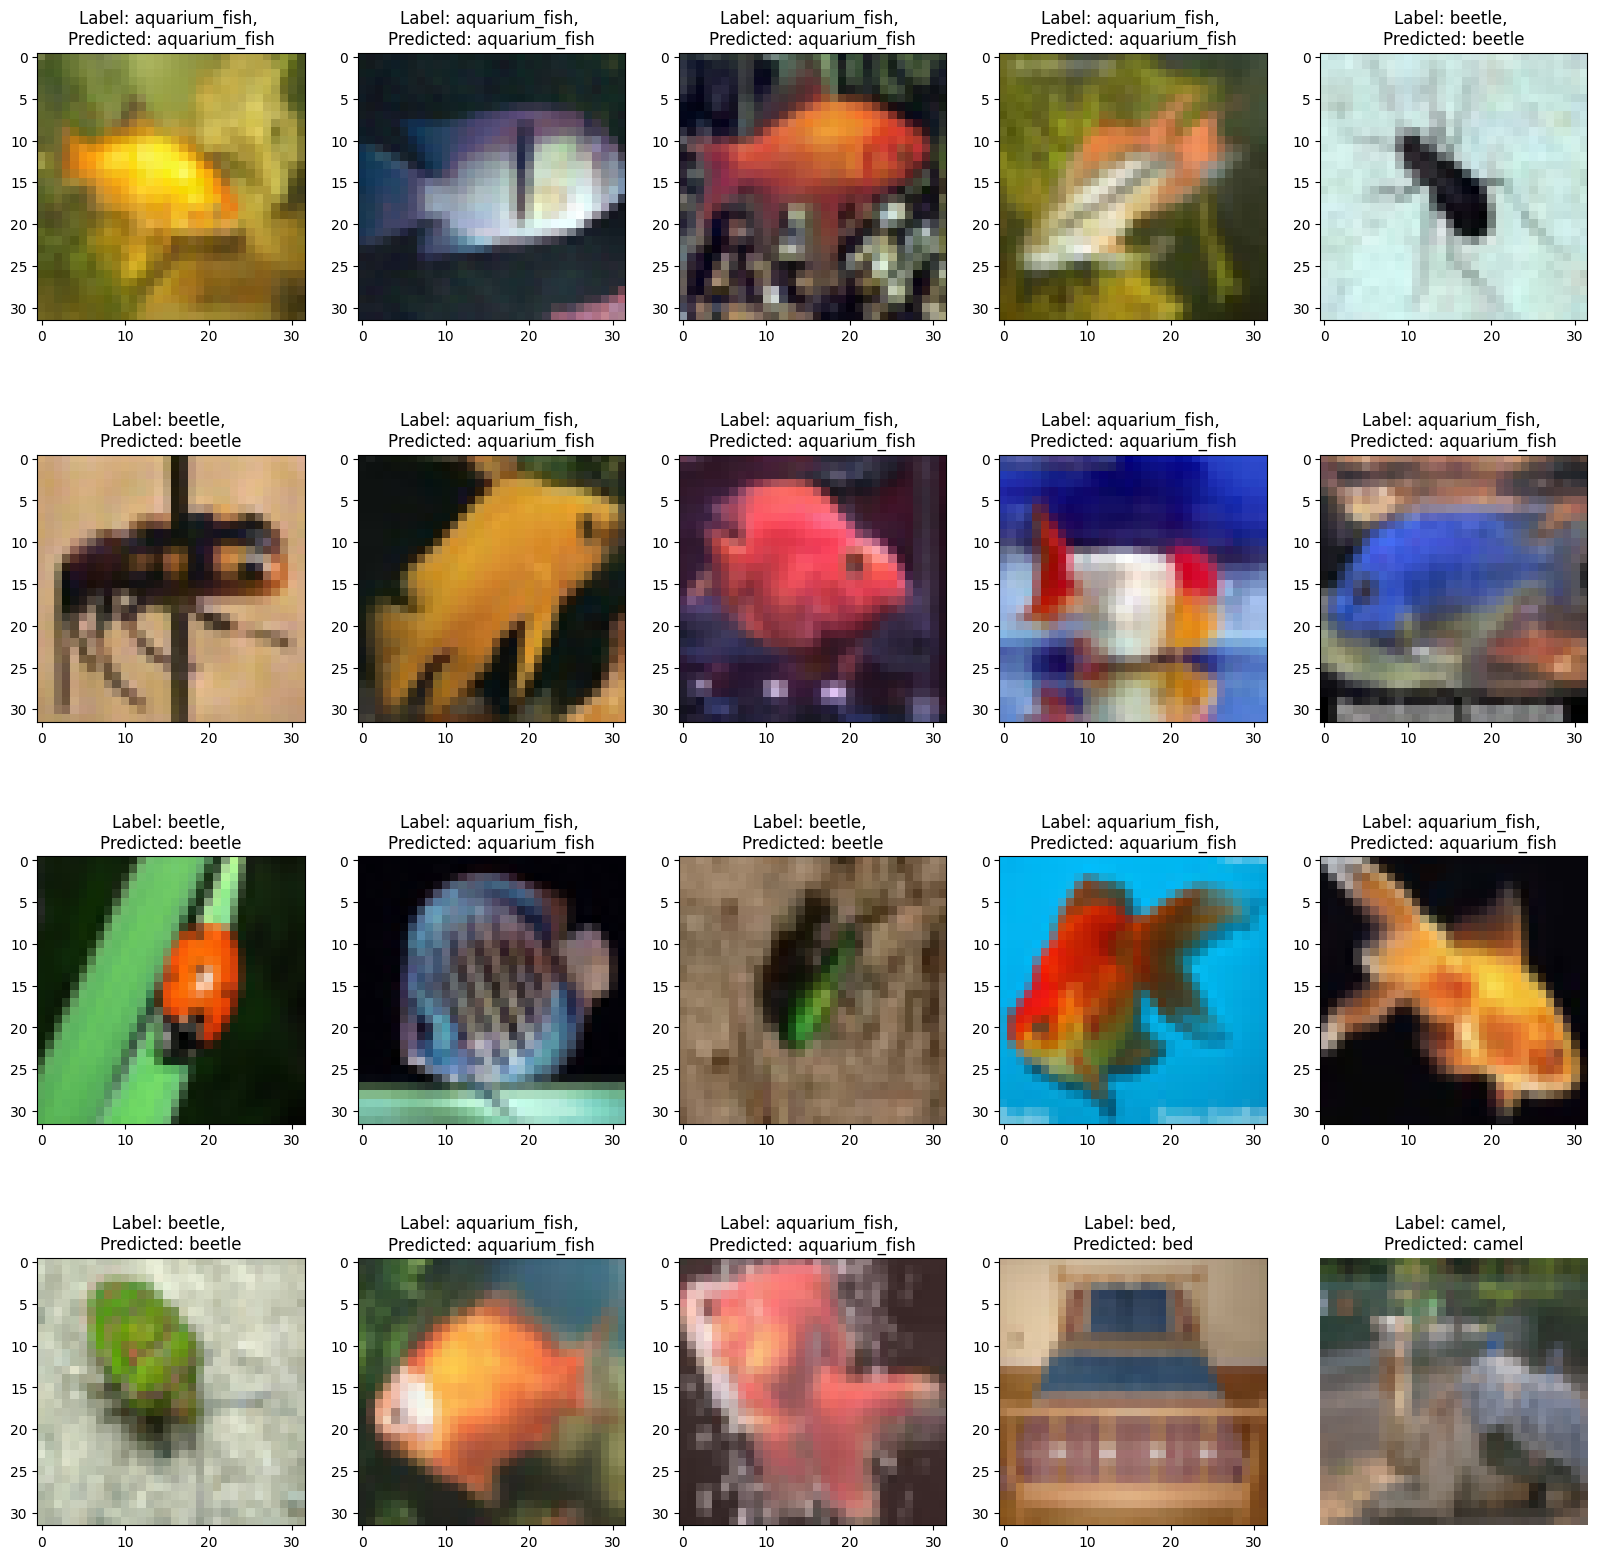

In [36]:
random_idxs = np.random.choice(X_test_wrong.shape[0], 20, replace=False)

fig, ax = plt.subplots(4, 5, figsize=(20, 20))
plt.axis("off")
for idx, subplot in zip(random_idxs, ax.ravel()):
  pred = labels[y_pred_wrong[idx]]
  actual = labels[y_test_wrong[idx]]
  subplot.imshow(X_test_wrong[idx], cmap='gray')
  subplot.set_title(f"Label: {actual}, \nPredicted: {pred}")


# Predicted wrongly for Coarse labels

In [30]:
wrong_example_mask = (np.argmax(y_test_coarse, axis=1) != predicted_classes)
X_test_wrong = X_test_coarse[wrong_example_mask]
y_test_wrong = np.argmax(y_test_coarse[wrong_example_mask], axis=1)
y_pred_wrong = predicted_classes[wrong_example_mask]

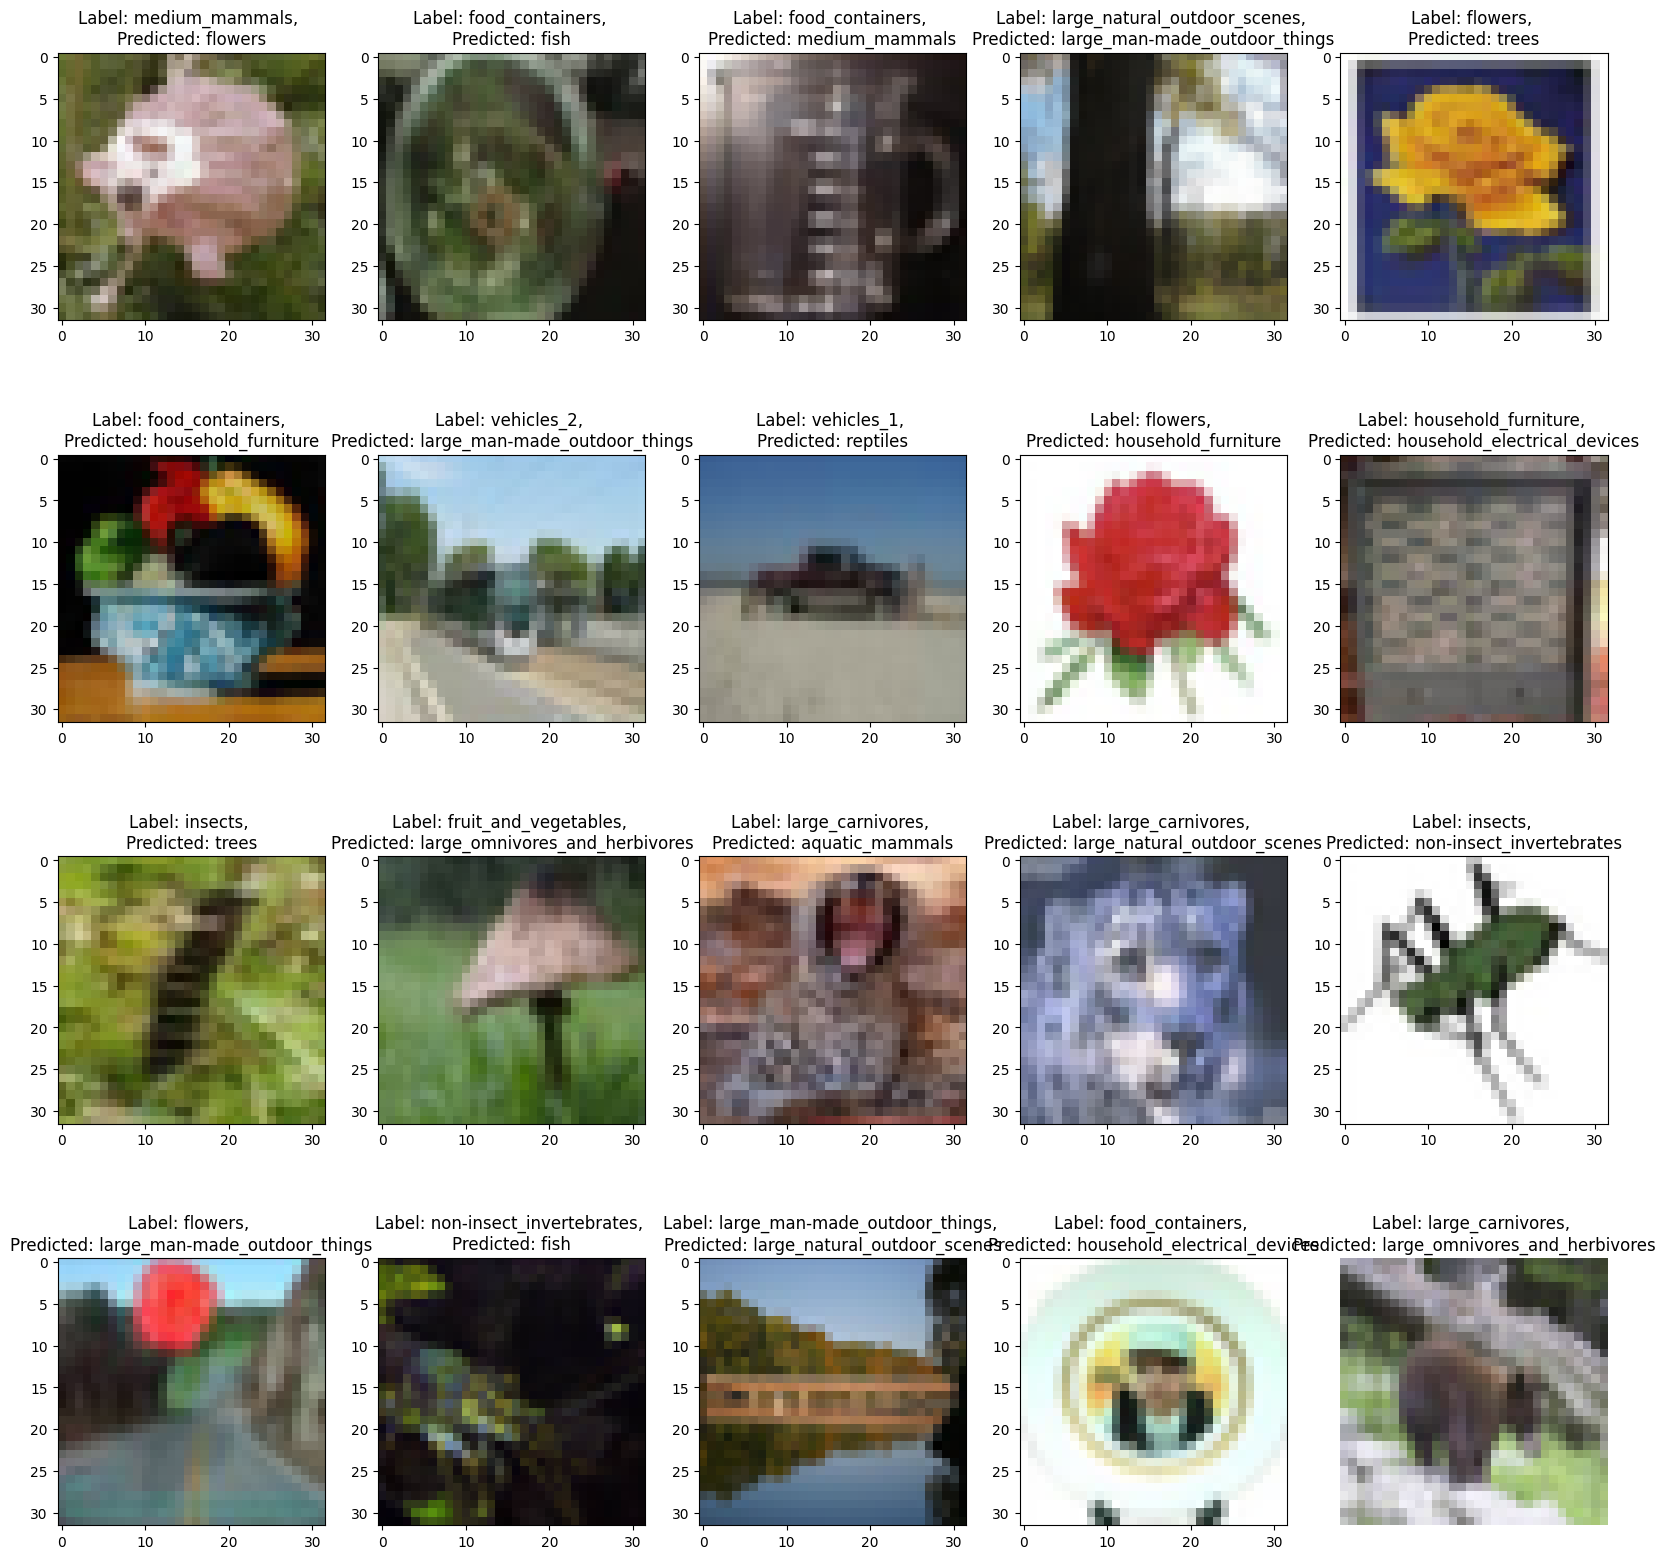

In [33]:
random_idxs = np.random.choice(X_test_wrong.shape[0], 20, replace=False)

fig, ax = plt.subplots(4, 5, figsize=(20, 20))
plt.axis("off")
for idx, subplot in zip(random_idxs, ax.ravel()):
  pred = Coarse_labels[y_pred_wrong[idx]]
  actual = Coarse_labels[y_test_wrong[idx]]
  subplot.imshow(X_test_wrong[idx], cmap='gray')
  subplot.set_title(f"Label: {actual}, \nPredicted: {pred}")


In [38]:
correct_example_mask = (np.argmax(y_test_coarse, axis=1) == predicted_classes)
X_test_right = X_test_coarse[correct_example_mask]
y_test_right = np.argmax(y_test_coarse[correct_example_mask], axis=1)
y_pred_right = predicted_classes[correct_example_mask]

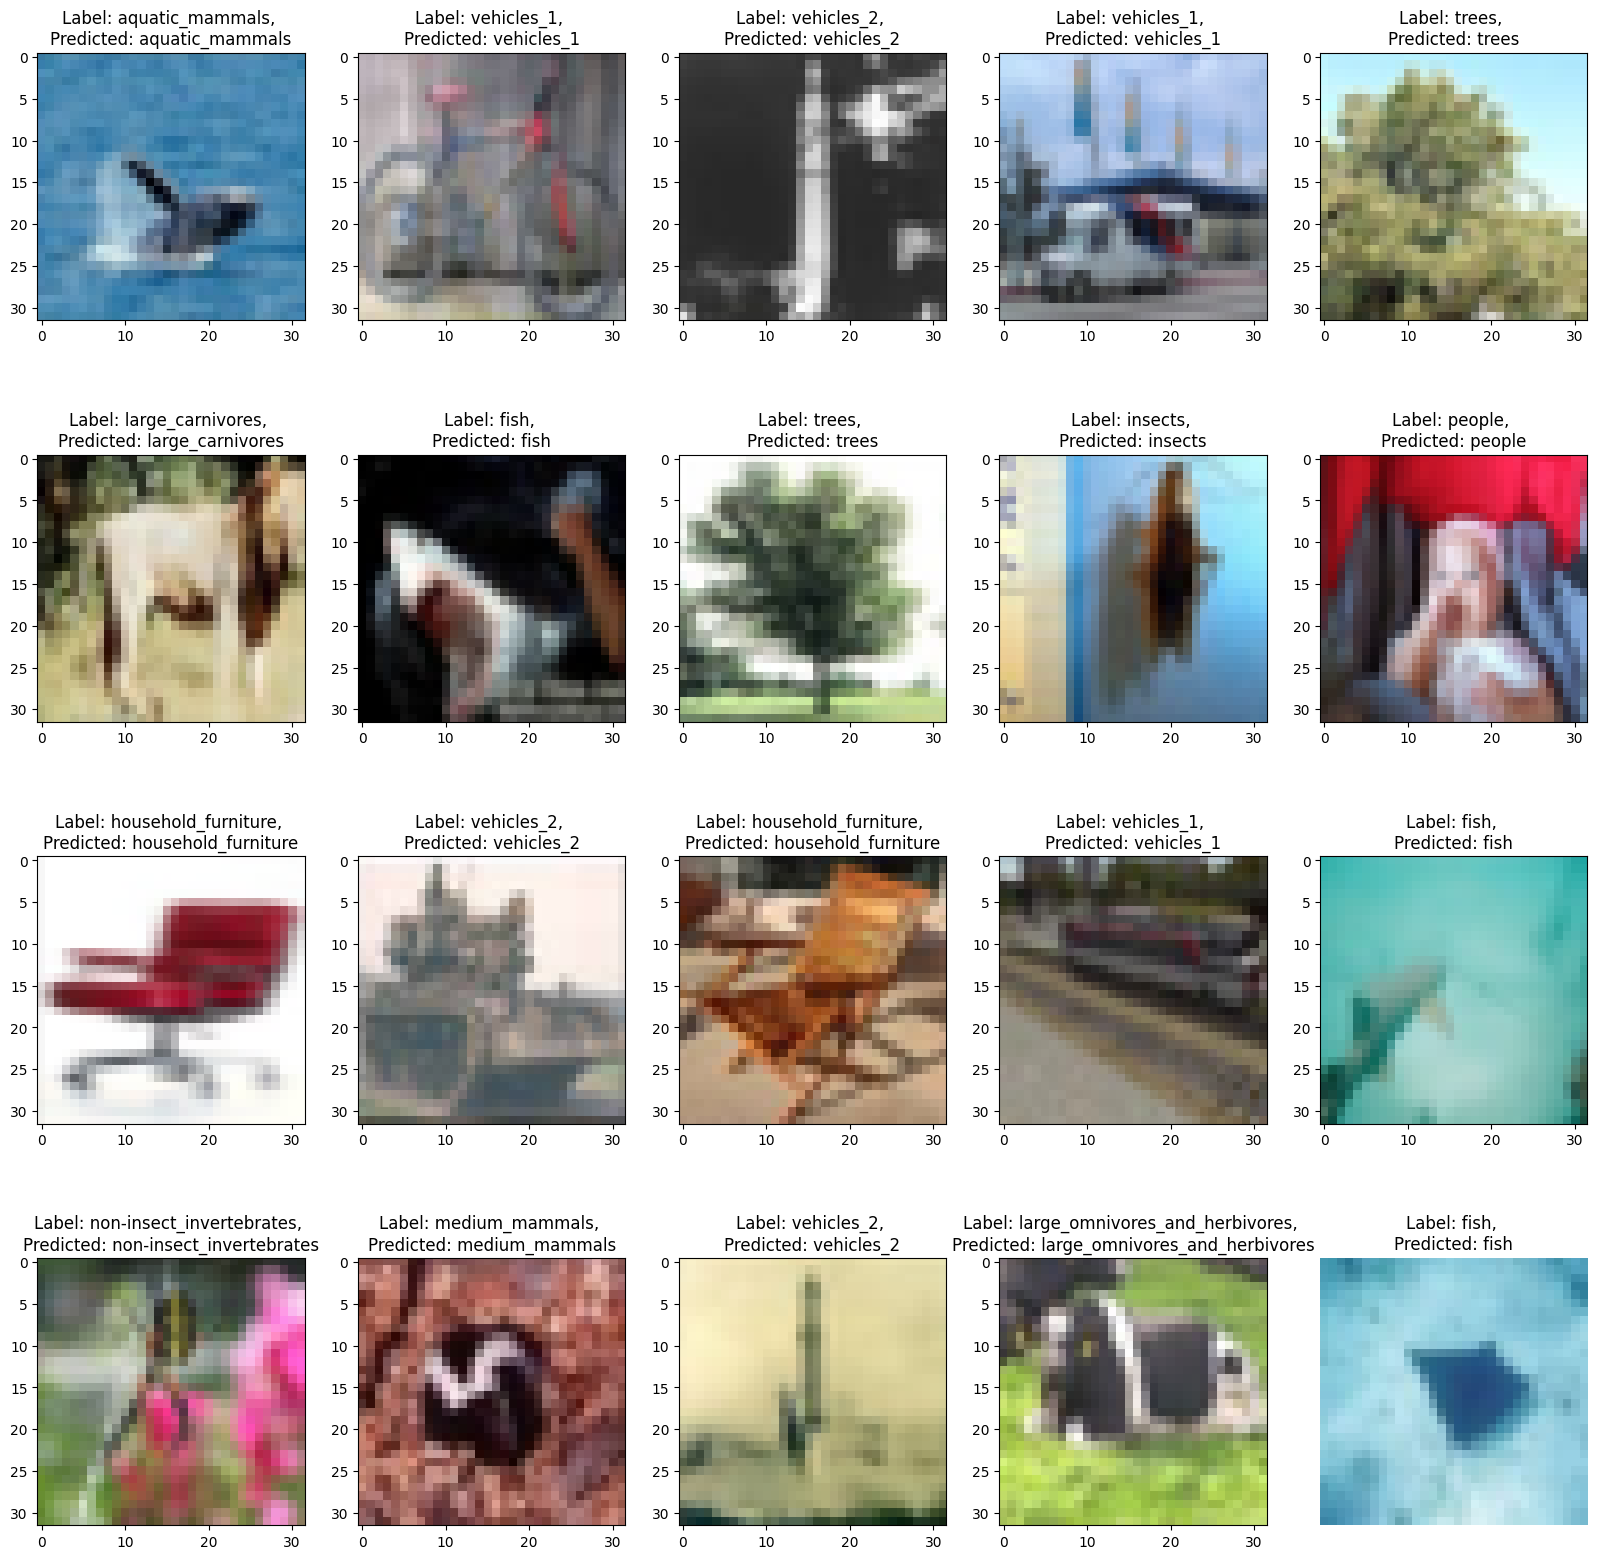

In [39]:
random_idxs = np.random.choice(X_test_right.shape[0], 20, replace=False)

fig, ax = plt.subplots(4, 5, figsize=(20, 20))
plt.axis("off")
for idx, subplot in zip(random_idxs, ax.ravel()):
  pred = Coarse_labels[y_pred_right[idx]]
  actual = Coarse_labels[y_test_right[idx]]
  subplot.imshow(X_test_right[idx], cmap='gray')
  subplot.set_title(f"Label: {actual}, \nPredicted: {pred}")


# Summary
Model improvement
    1. Adding batch normalization and dropout layers help to remove negative bias and prevent overfitting.
    2. Data augmentation - Doing Data augmentation for the CIFAR 100 actually improves drastically compared to the MNIST Fashion dataset. This is because our images are rgb which even in low resolution appear different from other classes. Compared to our Mnist fashion dataset, the classes to predict do not have enough data. Each classes only have 500 images which each coarse classes have 2500 images. Thus, in order to combat this, I augmented more 100000 more images to combat the lack of data. Our accuracy increase from 0.28 to 0,485
    3. Applying the previous two steps to the VGG baseline model, VGG is known to perform relatively well on the CIFAR-100 dataset, by adding weight decay to combat overfitting. The VGG model which I modified achieved 0.64 val accuracy.
    4. To Train the Coarse labels, I saved the VGG model that was trained above and loaded the weights into a new model. After I pop the last layer and added in a dense layer of 20 filters, then, we train our model on the coarse labels which resulted in an accuracy of 0.765.

Prediction
    Images that are predicted wrongly often resemble the outline of other animals such as the upper second image that is labeled man but the two person in the image sticks very closely to one another which resembles a butterfly. Which Images that are predicted correctly often have clear outlines and blocks of colours inside the outlines such as fishes. As it shows above, many of the correctly predicted classes are fishes.
    